## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [27]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

from tqdm.notebook import tqdm

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [28]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv"
fin = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [29]:
fin = fin.filter(like="score")

<IPython.core.display.Javascript object>

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [30]:
scaler = StandardScaler()
fin_scaled = scaler.fit_transform(fin)
fin_scaled = pd.DataFrame(fin_scaled, columns=fin.columns)

<IPython.core.display.Javascript object>

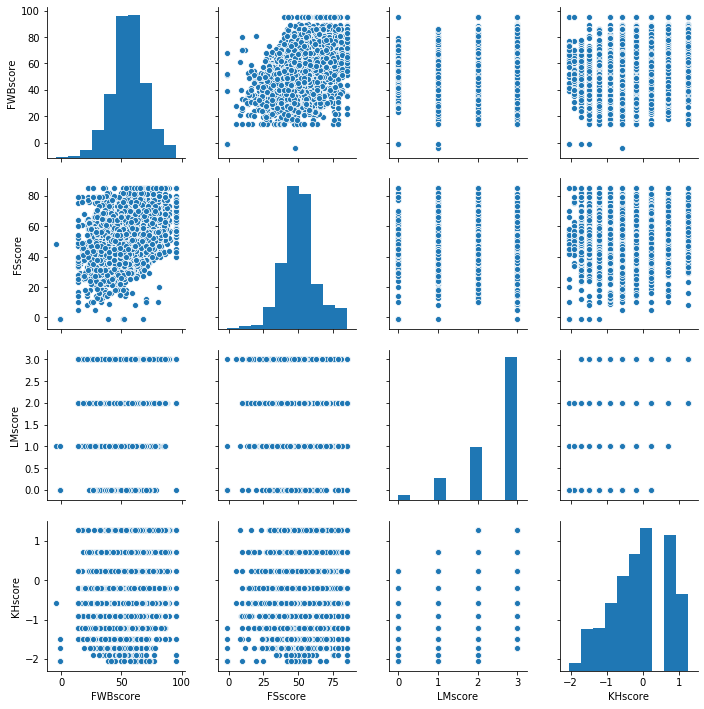

<IPython.core.display.Javascript object>

In [37]:
# A detour we can take is if we can eyeball any distinct groups in the data
# We only have 4 features so we can try and plot everything
sns.pairplot(fin)
plt.show()

In [38]:
# Really forced '4d' viz
px.scatter_3d(fin_scaled, "FWBscore", "FSscore", "KHscore", color="LMscore")

<IPython.core.display.Javascript object>

In [39]:
# Based on the plots, there's not super distinct groups based on the
# distribution of points.  I wouldn't expect our scores to be crushing it.

<IPython.core.display.Javascript object>

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

In [40]:
ks = range(2, 31)
sses = []
sil_scores = []
db_scores = []
for k in tqdm(ks):
    clst = KMeans(k)
    clst.fit(fin_scaled)

    sse = clst.inertia_
    sil_score = silhouette_score(fin_scaled, clst.labels_)
    db_score = davies_bouldin_score(fin_scaled, clst.labels_)

    sses.append(sse)
    sil_scores.append(sil_score)
    db_scores.append(db_score)

<IPython.core.display.Javascript object>

The best value of k by SSE is very hard to spot.  There is no clear 'elbow' in the plot. We would want to default to our project's objectives for guidance on what good clusters would be.  The business goals will take priority over score based metrics.

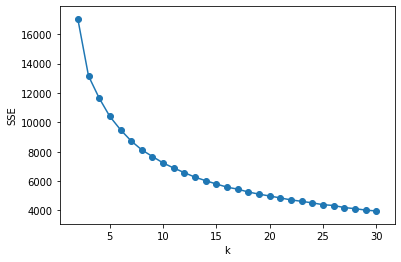

<IPython.core.display.Javascript object>

In [17]:
plt.plot(ks, sses)
plt.scatter(ks, sses)
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

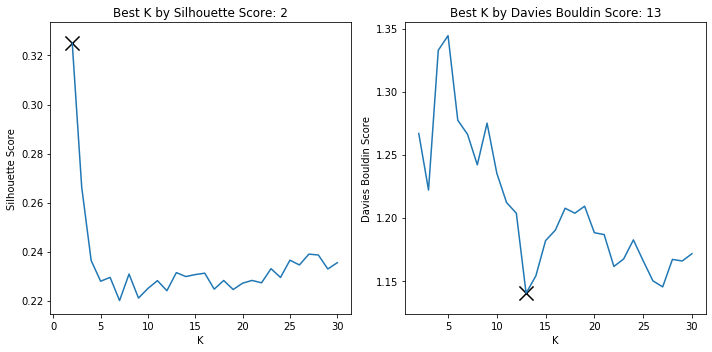

<IPython.core.display.Javascript object>

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

best_sil_score = max(sil_scores)
best_sil_score_k = sil_scores.index(best_sil_score) + 2
axes[0].plot(ks, sil_scores)
axes[0].scatter(best_sil_score_k, best_sil_score, marker="x", s=200, c="black")
axes[0].set_xlabel("K")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title(f"Best K by Silhouette Score: {best_sil_score_k}")

best_db_score = min(db_scores)
best_db_score_k = db_scores.index(best_db_score) + 2
axes[1].plot(ks, db_scores)
axes[1].scatter(best_db_score_k, best_db_score, marker="x", s=200, c="black")
axes[1].set_xlabel("K")
axes[1].set_ylabel("Davies Bouldin Score")
axes[1].set_title(f"Best K by Davies Bouldin Score: {best_db_score_k}")

plt.tight_layout()
plt.show()

In [47]:
# Clusters if we used sil score k of 2
clst = KMeans(2)
fin["label"] = clst.fit(fin_scaled).labels_

print(fin["label"].value_counts())

# Showing standard deviation of features by cluster
fin.groupby("label").std().style.background_gradient()

1    3991
0    2403
Name: label, dtype: int64


,FWBscore,FSscore,LMscore,KHscore
label,,,,
0,12.2963,12.5464,0.81775,0.559486
1,12.3662,11.3566,0.304634,0.57726


<IPython.core.display.Javascript object>

In [48]:
# Clusters if we used db score k of 13
clst = KMeans(13)
fin["label"] = clst.fit(fin_scaled).labels_

print(fin["label"].value_counts())

# Showing standard deviation of features by cluster
fin.groupby("label").std().style.background_gradient()

0     896
12    851
8     760
10    590
11    503
1     500
3     497
2     416
5     405
6     306
7     276
9     257
4     137
Name: label, dtype: int64


,FWBscore,FSscore,LMscore,KHscore
label,,,,
0,6.01188,5.66414,0.099774,0.347346
1,6.61233,6.79221,0,0.376195
2,10.3298,7.43249,0.214186,0.539876
3,7.83794,6.67454,0.226888,0.387275
4,10.6229,9.32673,0.593275,0.518265
5,8.01805,7.92207,0.222002,0.470644
6,9.67742,10.3633,0.500434,0.544945
7,8.94943,7.82311,0.227115,0.537242
8,6.90476,5.6898,0.0362738,0.351461


<IPython.core.display.Javascript object>